In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

filename = "../L-L1_GWOSC_16KHZ_R1-1266618157-32.hdf5"

with h5py.File(filename, "r") as f:
    strain_data = f["strain/Strain"][:]

In [61]:
CHUNK_SIZE = 1024
FS = 16384
fft_chunk = []

#splitting the data into 1024-element chunks and putting them into FFT to generate a raw spectrogram
for s in range(0, len(strain_data)-CHUNK_SIZE, CHUNK_SIZE//4):
    chunk = strain_data[s:s+CHUNK_SIZE] * np.hanning(CHUNK_SIZE)
    fft_chunk.append(10 * np.log10(np.abs(np.fft.rfft(chunk))))

spectro_data = np.array(fft_chunk).T

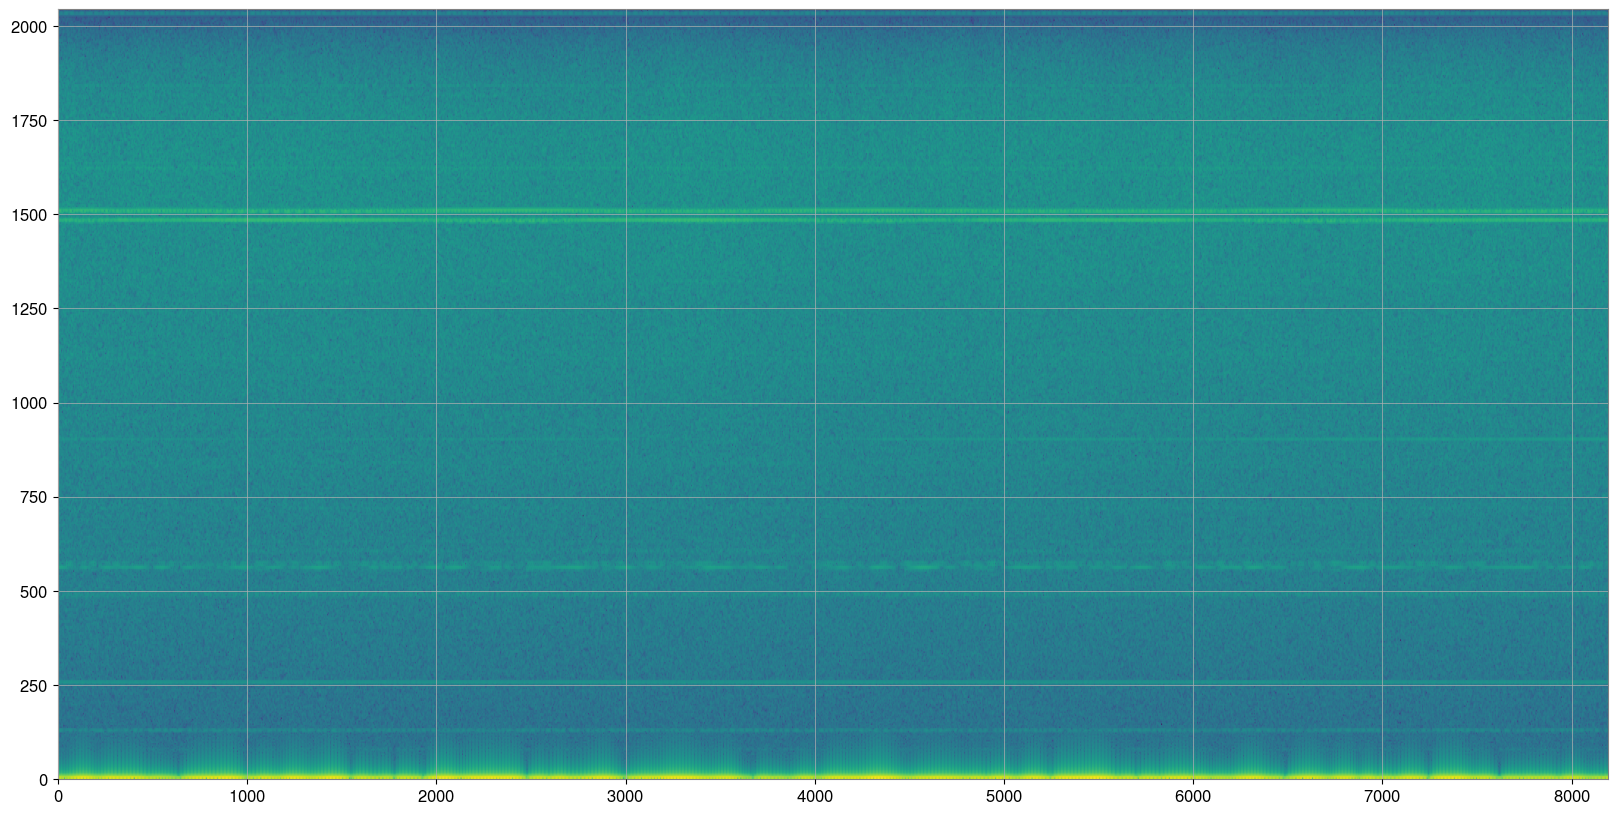

In [64]:
plt.figure(figsize=(20,10))
plt.imshow(spectro_data, 
           extent=(0,FS//2,0,spectro_data.shape[1]), 
           aspect="auto",
          origin="lower")

In [59]:
spectro_data.shape

(513, 2044)

In [ ]:
# The spectrogram doesnt show anything no matter what i do with it.
# Recently learned about Q-transform, going to try that